### PyTorch DataLoader Example

This example defines and uses a PyTorch `DataLoader`
with an image transformation pipeline
on the image dataset
[102 Category Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/)
which has been integrated into PyTorch as
[torchvision.datasets.Flowers102](https://pytorch.org/vision/main/generated/torchvision.datasets.Flowers102.html).

In [1]:
# in this code block we have all out imports

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(42)

In [2]:
# in this code block we have some variables regarding data loading

batch_size = 16
shuffle = True
image_height_temporary = 256
image_width = 224
image_height = image_width

In [3]:
# in this code block we define a custom transformation regarding gamma, brightness, saturation

class CustomImageTransform:
    """Adust an image in a custom way."""

    def __call__(self, img):
        img = TF.adjust_gamma(img, 1.6, 1.1)
        img = TF.adjust_brightness(img, 0.7)
        img = TF.adjust_saturation(img, 1.5)
        return img


In [4]:
# in this code block we define our image transformation pipeline treating the images a bit

transformations = transforms.Compose([
                                      transforms.Resize(384, transforms.InterpolationMode.BICUBIC, antialias=True),
                                      transforms.CenterCrop([320, 320]),
                                      transforms.GaussianBlur(kernel_size=3.0,sigma=2.0),
                                      CustomImageTransform(),
                                      transforms.RandomAutocontrast(p=1.0),
                                      transforms.RandomAdjustSharpness(sharpness_factor=4, p=1.0),
                                      transforms.GaussianBlur(kernel_size=1.5,sigma=1.5),
                                      transforms.Resize(image_height_temporary, transforms.InterpolationMode.BICUBIC, antialias=True),
                                      transforms.CenterCrop([image_height, image_width]),
                                      transforms.ToTensor()#,
                                      #transforms.Normalize([0.485, 0.456, 0.406], 
                                      #                     [0.229, 0.224, 0.225])
                                    ])

# regarding the out-commented standardization
# Some pre-trained networks you might use were trained on the ImageNet dataset
# where each color channel was normalized separately. For all three sets you would
# need to normalize the means and standard deviations of the images to what the network expects.
# For the means, it is [0.485, 0.456, 0.406] and for the standard deviations [0.229, 0.224, 0.225]
# as calculated from the ImageNet images.
# These values would shift each color channel to be centered at 0 and range from -1 to 1.

In [5]:
# in this code block we define the train, val, test dataset

dataset_train = datasets.Flowers102(
    root='../../../../Datasets/PyTorch',
    split='train',
    download=True,
    transform=transformations
)

dataset_val = datasets.Flowers102(
    root='../../../../Datasets/PyTorch',
    split='val',
    download=True,
    transform=transformations
)

dataset_test = datasets.Flowers102(
    root='../../../../Datasets/PyTorch',
    split='test',
    download=True,
    transform=transformations
)


In [6]:
# in this code block we define respective data loaders

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=shuffle)
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=shuffle)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=shuffle)

torch.Size([16, 3, 224, 224])
torch.Size([16])
torch.Size([3, 224, 224])
tensor(85)


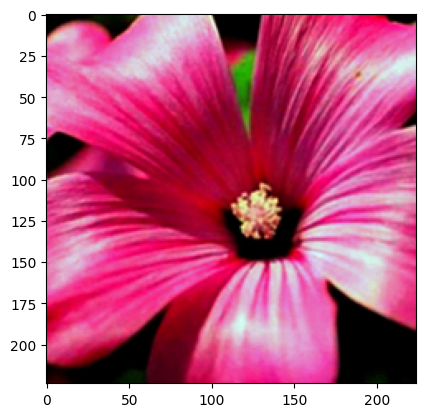

In [20]:
# in this code block we just run the data loader once and plot an image

images_example1, labels_example1 = next(iter(DataLoader(dataset_train, batch_size=batch_size, shuffle=shuffle)))
print(images_example1.size())
print(labels_example1.size())
image_example1 = images_example1[0]
label_example1 = labels_example1[0]
print(image_example1.size())
print(label_example1)
# given a 3 by 224 by 224 Tensor representing an image
# use .permute(1, 2, 0) to move the channel values from the first to the last dimension
image_example1 = image_example1
plt.imshow(image_example1.permute(1, 2, 0))
